In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Average radius = 1.42 ± 0.01 bar


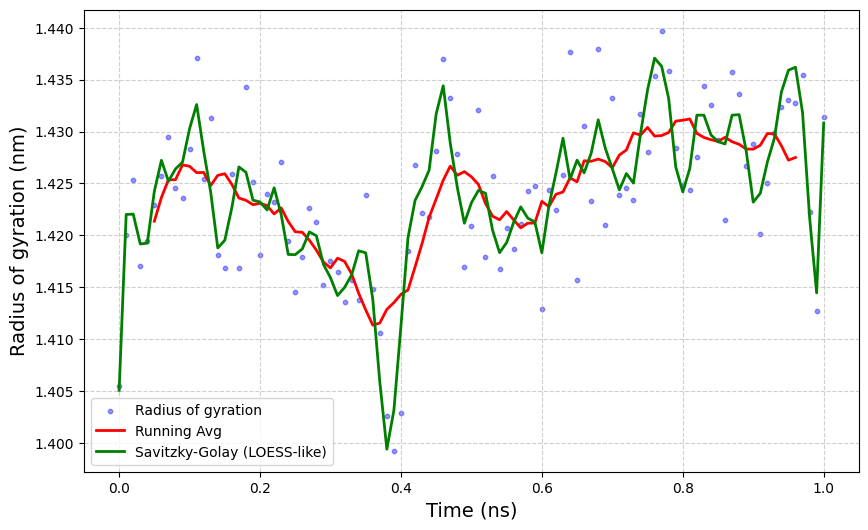

In [3]:


file_path = "/Users/samirabaghbanbari/samira/code/data/gyrate.xvg"

# extract time and pressure
time = []
radius = []

with open(file_path, "r") as f:
    for line in f:
        if line.startswith(("#", "@")):
            continue 
        parts = line.strip().split()
        if len(parts) >= 2:
            try:
                t = float(parts[0])
                g = float(parts[1])
                time.append(t)
                radius.append(g)
            except ValueError:
                continue

df = pd.DataFrame({"Time_ns": time, "Radius_nm": radius})

# Compute running average (moving window of e.g. 10 points)
window_size = 10
df["RunningAvg"] = df["Radius_nm"].rolling(window=window_size, center=True).mean()

# Calculate mean and std deviation
mean_Radius = df["Radius_nm"].mean()
std_Radius = df["Radius_nm"].std()
print(f"Average radius = {mean_Radius:.2f} ± {std_Radius:.2f} bar")

# apply LOESS fit 
from scipy.signal import savgol_filter
import numpy as np

x = df["Time_ns"].values
y = df["Radius_nm"].values

# Savitzky-Golay smoothing (like LOESS, local polynomial fit)
polyorder = 5
y_savgol = savgol_filter(y, window_size, polyorder)

plt.figure(figsize=(10, 6))
plt.xlabel("Time (ns)", fontsize=14)
plt.ylabel("Radius of gyration (nm)", fontsize=14)
plt.scatter(x, y, color="blue", s=10, alpha=0.4, label="Radius of gyration")
plt.plot(x, df["RunningAvg"], color="red", linewidth=2, label="Running Avg")
plt.plot(x, y_savgol, color="green", linewidth=2, label="Savitzky-Golay (LOESS-like)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
